In [1]:
!pip install --upgrade llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.8-cp311-cp311-linux_x86_64.whl size=6008054 sha256=97c1b0cc568a8c8d69574f5374ae2a56a498047ef6425a8d915eae0606f27593
  Stored in directory: /root/.cache/pip/wheels/c0/03/66/eb3810eafd55d921b2be32896d1f44313996982360663aa80b
Successfully built llama-cpp-python


In [2]:
# Install necessary libraries
!pip install -q diffusers transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00


In [5]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

# Replace with your GGUF model's Hugging Face repository path
model_name = "Ahmed3310/lora_model_marketmind_v1_gguf_v2"

# Download the GGUF model to local storage
model_path = hf_hub_download(repo_id=model_name, filename="unsloth.Q4_K_M.gguf")

# Load the GGUF model from the downloaded path
llm = Llama(
    model_path=model_path,
    n_ctx=2048,  # Adjust context length if needed
    n_gpu_layers=40  # Use GPU layers if available
)

unsloth.Q4_K_M.gguf:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 28 key-value pairs and 292 tensors from /root/.cache/huggingface/hub/models--Ahmed3310--lora_model_marketmind_v1_gguf_v2/snapshots/9ff964cb0f2ca7dd80a3b3d32a5d634ad85410f7/unsloth.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Lora_Model_Marketmind_V1_Gguf_V2
llama_model_loader: - kv   3:                         general.size_label str              = 8.0B
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                       llama.context_length u32              = 131072
llama_model_loader: - kv   6:

In [18]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:
{output}"""
instruction = "Generate an SDXL design prompt for the following product."
input_text = "A dark-brown glass bottle of hemp seed oil for body care  sits on a light beige surface.(america)"
output = ""  # Leave blank for generation

prompt = alpaca_prompt.format(
    instruction=instruction,
    input=input_text,
    output=output
)

# Generate the response
response = llm(prompt, max_tokens=1000)  # Stop at "###" to avoid continuing beyond the response

# Print the generated text
print(response['choices'][0]['text'])

Llama.generate: 55 prefix-match hit, remaining 17 prompt tokens to eval
llama_perf_context_print:        load time =   30409.64 ms
llama_perf_context_print: prompt eval time =   35619.21 ms /    34 tokens ( 1047.62 ms per token,     0.95 tokens per second)
llama_perf_context_print:        eval time =  189381.17 ms /   261 runs   (  725.60 ms per token,     1.38 tokens per second)
llama_perf_context_print:       total time =  196936.09 ms /   295 tokens


### Inpainting Prompt
A dark-brown glass bottle of hemp seed oil for body care sits on a light beige surface in a modern American home bathroom. The background should feature a subtle, minimalist shower area with a rain showerhead and a few calming plants. Seamlessly blend the bottle into the scene, maintaining its realistic appearance. Focus on making the lighting soft and inviting, evoking a sense of relaxation and natural beauty.

### Audio Narration
(Warm, calming voice) Unwind with the nourishing power of hemp seed oil. Harvested from nature, this rich, dark-brown elixir moisturizes and protects your skin. Imagine the gentle glide of its soothing touch, leaving your skin feeling soft and refreshed. Perfect for body care, face care, or as a finishing touch after your shower. Discover the natural beauty within. Hemp seed oil - nurture your skin, naturally.

### Social Media Post
Nourish your skin with the power of nature! 💆‍♀️ Our hemp seed oil is the ultimate body care secret. Soft

In [7]:
!git clone https://github.com/xuebinqin/U-2-Net.git


Cloning into 'U-2-Net'...
remote: Enumerating objects: 1077, done.
remote: Counting objects: 100% (422/422), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1077 (delta 398), reused 380 (delta 380), pack-reused 655 (from 2)
Receiving objects: 100% (1077/1077), 66.95 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (539/539), done.


In [8]:
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
From (redirected): https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ&confirm=t&uuid=da22ca22-f66b-4635-8cc8-29ffa7c52aa8
To: /content/u2net.pth
100% 176M/176M [00:04<00:00, 38.6MB/s]


In [9]:
%cd U-2-Net

/content/U-2-Net


In [12]:
import os
from skimage import io, transform
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms#, utils
# import torch.optim as optim

import numpy as np
from PIL import Image
import glob

from data_loader import RescaleT
from data_loader import ToTensor
from data_loader import ToTensorLab
from data_loader import SalObjDataset

from model import U2NET # full size version 173.6 MB
from model import U2NETP # small version u2net 4.7 MB

# normalize the predicted SOD probability map
def normPRED(d):
    ma = torch.max(d)
    mi = torch.min(d)

    dn = (d-mi)/(ma-mi)

    return dn

def save_output(image_name,pred,d_dir):

    predict = pred
    predict = predict.squeeze()
    predict_np = predict.cpu().data.numpy()

    im = Image.fromarray(predict_np*255).convert('RGB')
    img_name = image_name.split(os.sep)[-1]
    image = io.imread(image_name)
    imo = im.resize((image.shape[1],image.shape[0]),resample=Image.BILINEAR)

    pb_np = np.array(imo)

    aaa = img_name.split(".")
    bbb = aaa[0:-1]
    imidx = bbb[0]
    for i in range(1,len(bbb)):
        imidx = imidx + "." + bbb[i]

    imo.save(d_dir+imidx+'.png')

def main():

    # --------- 1. get image path and name ---------
    model_name='u2net'#u2netp



    image_dir=os.path.join(os.getcwd(),'test_data','images','input')
    prediction_dir=os.path.join(os.getcwd(),'test_data','images',model_name+'_results'+os.sep)
    model_dir = os.path.join(os.getcwd(),'saved_models',model_name,model_name+'.pth')

    img_name_list = glob.glob(image_dir + os.sep + '*')
    print(img_name_list)

    # --------- 2. dataloader ---------
    #1. dataloader
    test_salobj_dataset = SalObjDataset(img_name_list = img_name_list,
                                        lbl_name_list = [],
                                        transform=transforms.Compose([RescaleT(320),
                                                                      ToTensorLab(flag=0)])
                                        )
    test_salobj_dataloader = DataLoader(test_salobj_dataset,
                                        batch_size=1,
                                        shuffle=False,
                                        num_workers=1)

    # --------- 3. model define ---------
    if(model_name=='u2net'):
        print("...load U2NET---173.6 MB")
        net = U2NET(3,1)
    elif(model_name=='u2netp'):
        print("...load U2NEP---4.7 MB")
        net = U2NETP(3,1)
    if torch.cuda.is_available():
        net.load_state_dict(torch.load(model_dir))
        net.cuda()
    else:
        net.load_state_dict(torch.load(model_dir, map_location='cpu'))
    net.eval()

    # --------- 4. inference for each image ---------
    for i_test, data_test in enumerate(test_salobj_dataloader):

        print("inferencing:",img_name_list[i_test].split(os.sep)[-1])

        inputs_test = data_test['image']
        inputs_test = inputs_test.type(torch.FloatTensor)

        if torch.cuda.is_available():
            inputs_test = Variable(inputs_test.cuda())
        else:
            inputs_test = Variable(inputs_test)

        d1,d2,d3,d4,d5,d6,d7= net(inputs_test)

        # normalization
        pred = d1[:,0,:,:]
        pred = normPRED(pred)

        # save results to test_results folder
        if not os.path.exists(prediction_dir):
            os.makedirs(prediction_dir, exist_ok=True)
        save_output(img_name_list[i_test],pred,prediction_dir)

        del d1,d2,d3,d4,d5,d6,d7

if __name__ == "__main__":
    main()

['/content/U-2-Net/test_data/images/input/other-cup.jpeg', '/content/U-2-Net/test_data/images/input/dabouza.jpg']
...load U2NET---173.6 MB
inferencing: other-cup.jpeg


/content/U-2-Net/model/u2net.py:23: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  src = F.upsample(src,size=tar.shape[2:],mode='bilinear')


inferencing: dabouza.jpg


/content/U-2-Net/model/u2net.py:23: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  src = F.upsample(src,size=tar.shape[2:],mode='bilinear')


In [13]:
# Install necessary libraries
!pip install -q diffusers transformers accelerate torch

In [14]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch


pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [19]:
%cd ..

/content


Original Image:


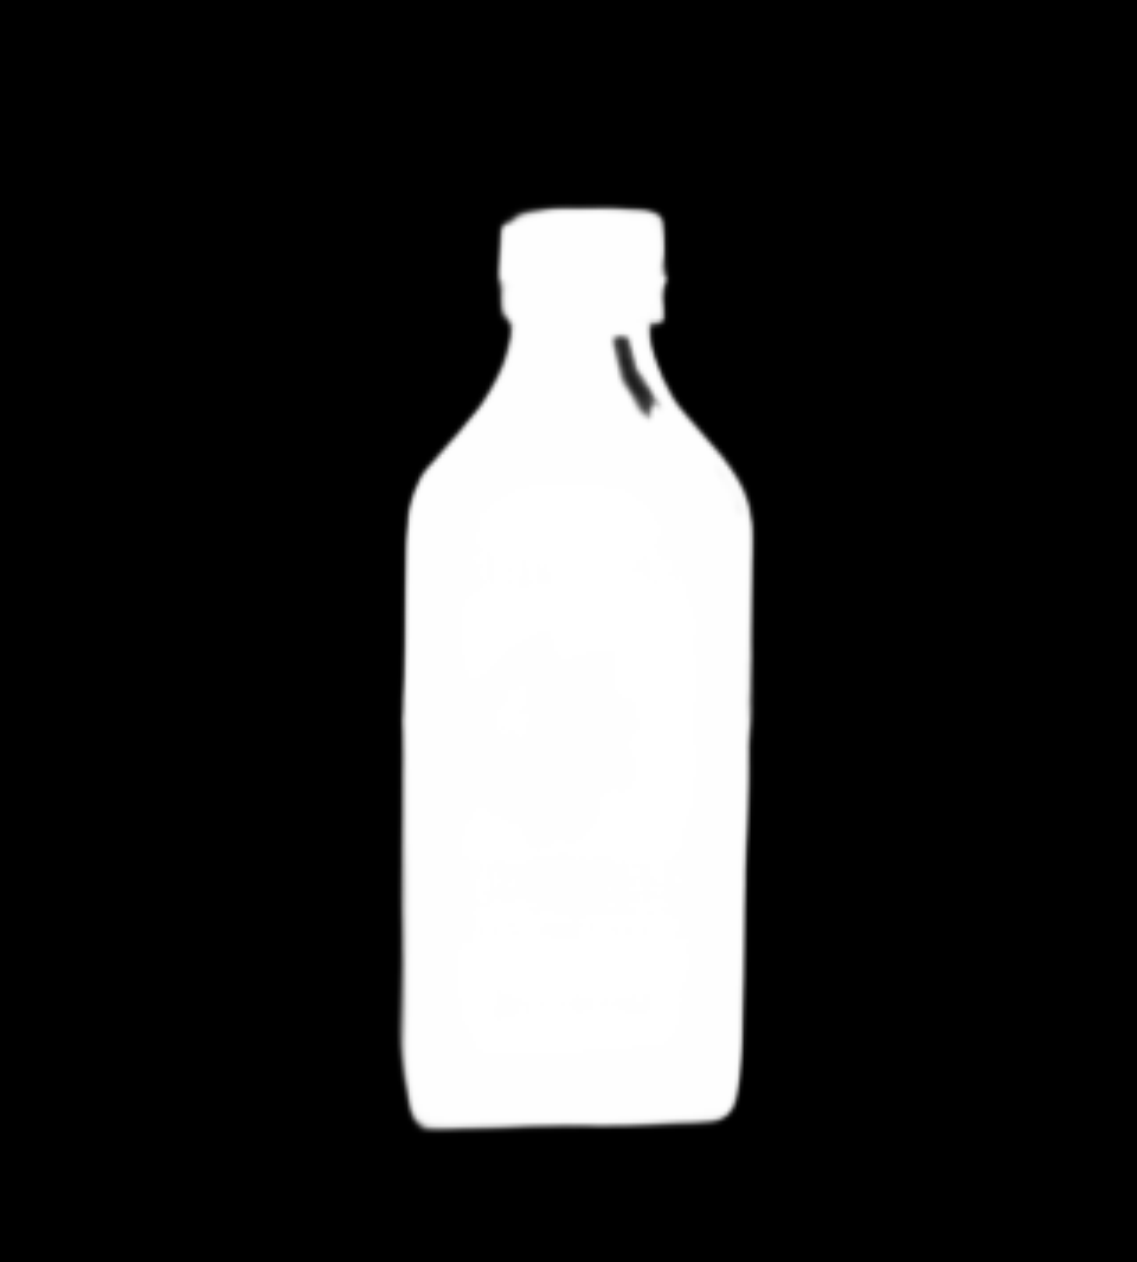


Inverted Image:


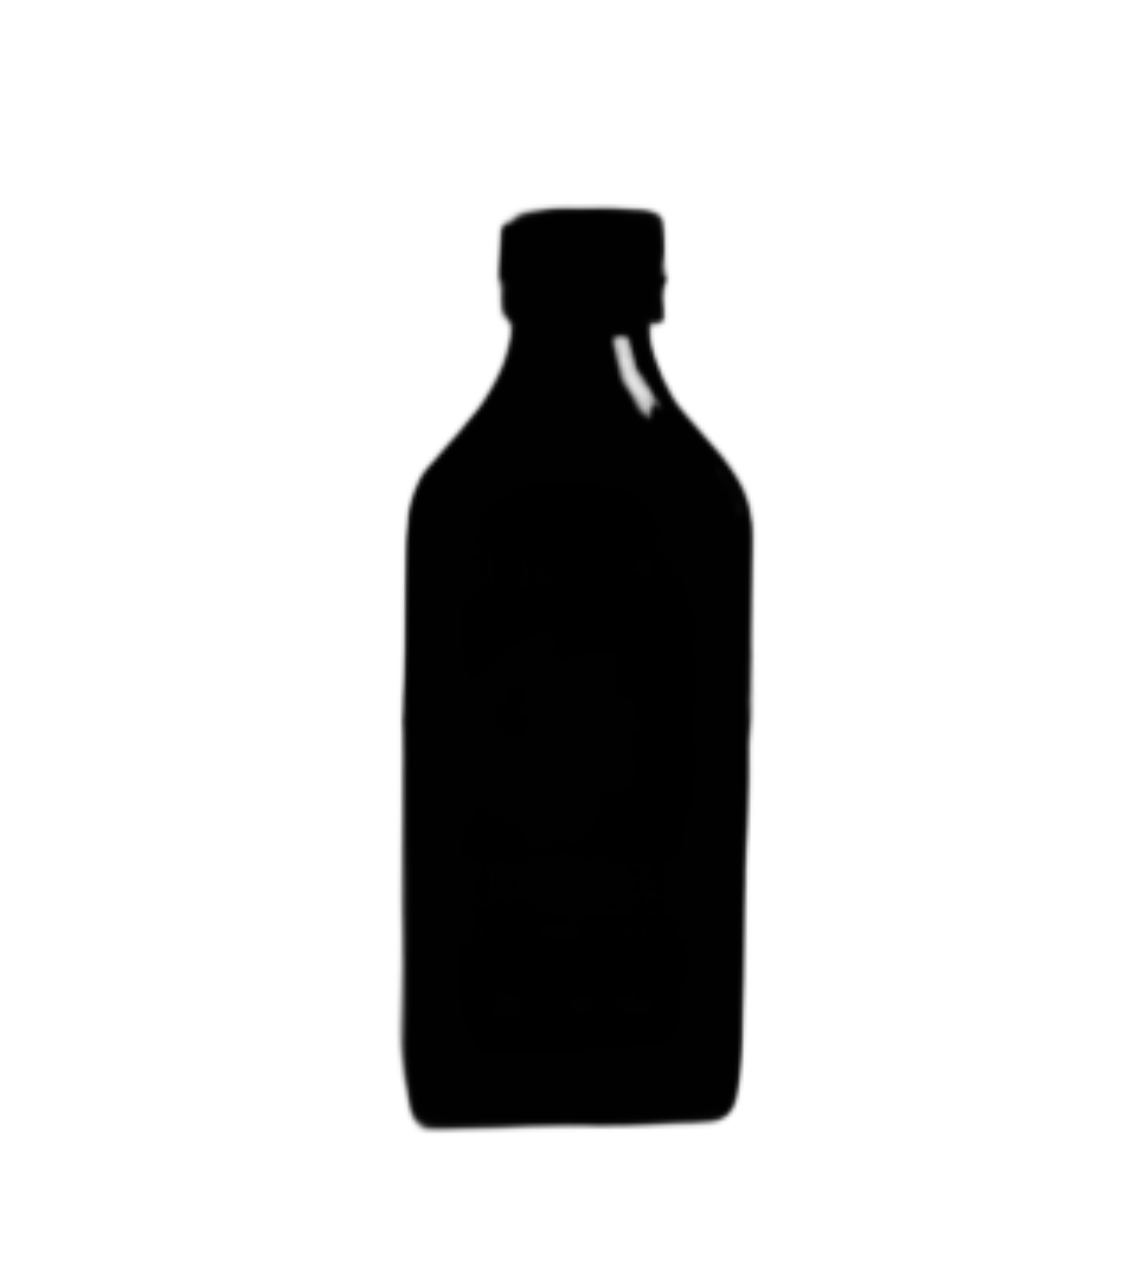


Inverted image saved as: /content/U-2-Net/test_data/images/u2net_results/dabouza_inverted.png


'/content/U-2-Net/test_data/images/u2net_results/dabouza_inverted.png'

In [20]:
from PIL import Image, ImageOps
from IPython.display import display

def invert_image(image_path):
    """
    Inverts a black and white image in Colab

    Args:
        image_path (str): Path to the image file in your Colab workspace
    """
    try:
        # Open the image
        original_img = Image.open(image_path)

        # Convert to grayscale if not already
        if original_img.mode != 'L':
            original_img = original_img.convert('L')

        # Invert the image
        inverted_img = ImageOps.invert(original_img)

        # Create output filename
        if '.' in image_path:
            parts = image_path.rsplit('.', 1)
            output_path = f"{parts[0]}_inverted.{parts[1]}"
        else:
            output_path = f"{image_path}_inverted"

        # Save the inverted image
        inverted_img.save(output_path)

        # Display results
        print("Original Image:")
        display(original_img)

        print("\nInverted Image:")
        display(inverted_img)

        print(f"\nInverted image saved as: {output_path}")
        return output_path

    except Exception as e:
        print(f"Error: {e}")
        return None


invert_image("/content/U-2-Net/test_data/images/u2net_results/dabouza.png")


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and natural beauty']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['and natural beauty']


  0%|          | 0/49 [00:00<?, ?it/s]

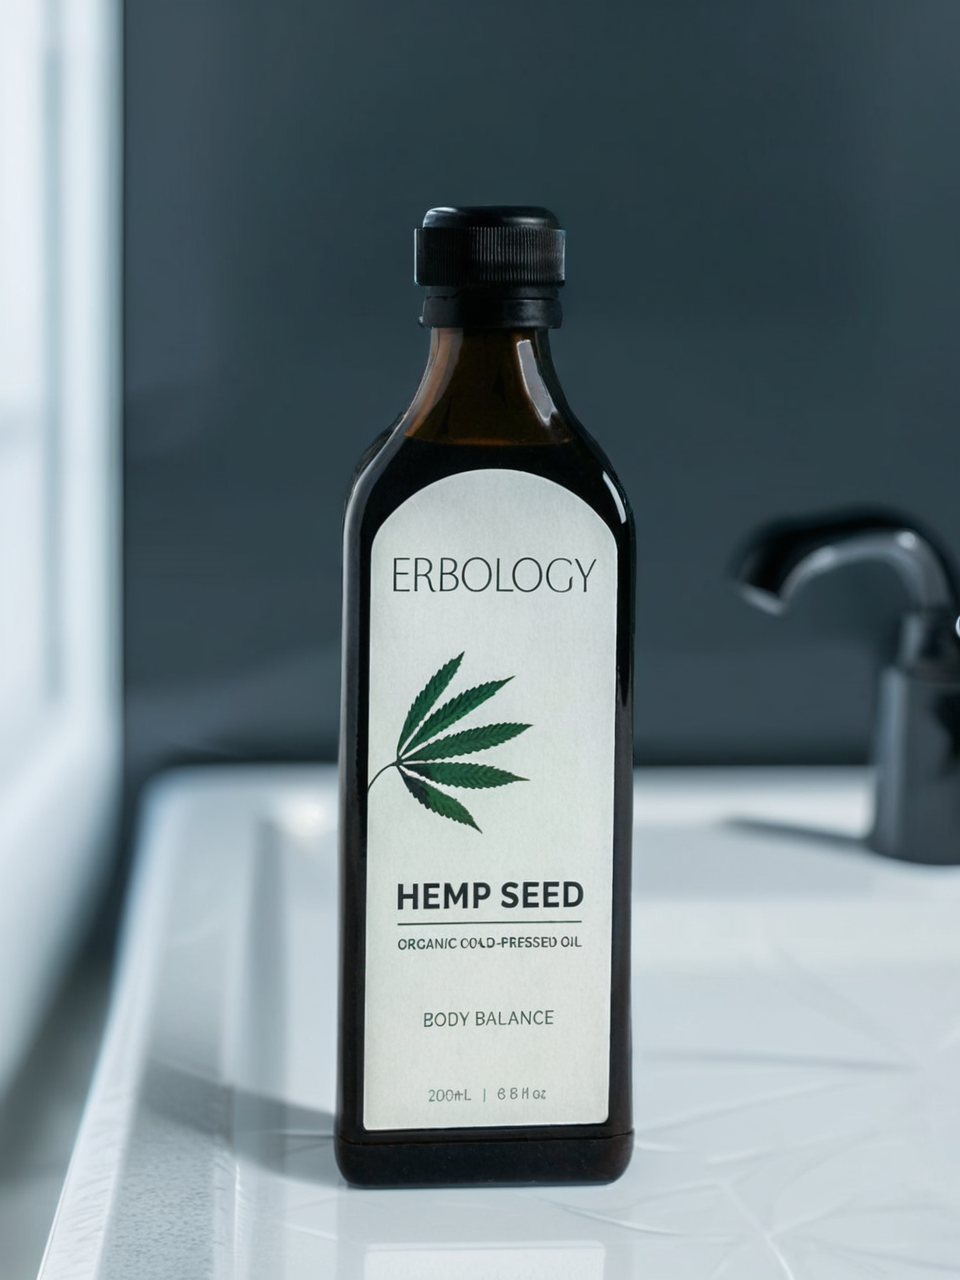

In [23]:
# Load a sample image and mask (replace with your own URLs or upload files)
from PIL import Image

init_image = Image.open("/content/U-2-Net/test_data/images/input/dabouza.jpg").convert("RGB")
#init_image = init_image.resize((1024, 1024), Image.LANCZOS)
mask_image = Image.open("/content/U-2-Net/test_data/images/u2net_results/dabouza_inverted.png").convert("RGB")
#mask_image = mask_image.resize((1024, 1024), Image.LANCZOS)
# Define the prompt for inpainting
prompt = """
A dark-brown glass bottle of hemp seed oil for sits on a light beige surface in a modern American home bathroom. The background should feature a subtle, minimalist shower area with a rain showerhead and a few calming plants. Seamlessly blend the bottle into the scene, maintaining its realistic appearance. Focus on making the lighting soft and inviting, evoking a sense of relaxation and natural beauty"""

negative_prompt = """
changing the product
"""
# Use more steps (e.g., 50) since this isn’t Turbo; adjust for quality vs. speed
output = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=50,  # Higher steps for better quality
    guidance_scale=7.5,     # Standard CFG for SDXL
    strength=0.99,          # Nearly full regeneration of masked area
    negative_prompt=negative_prompt,
    height=1280,
    width=960
).images[0]

# Save and display the result
output.save("inpainted_result_amine.png")
output